In [27]:
import re
import numpy as np
from statistics import mean, stdev
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import seaborn as sns
fsl = ["Bento-fs", "Bento-user", "Bento-prov", "ext4-ordered", "ext4-journal"]

In [22]:
def parse_elapsed_secs(s):
	secs = 0.0
	secs += float(s.split(":")[0]) * 60
	secs += float(s.split(":")[1].split(".")[0])
	secs += float("0." + s.split(":")[1].split(".")[1])
	return secs

In [41]:
def bar_plot(ax, data, l, colors=None, total_width=0.8, single_width=1):
    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])
    
    if l is not None:
        ax.legend(bars, l)

{'Bento-fs': [33.766999999999996, 165.06799999999998], 'Bento-user': [37.865, 167.606], 'Bento-prov': [34.21, 165.18], 'ext4-ordered': [34.541, 165.739], 'ext4-journal': [37.016, 168.482]}
{'Bento-fs': [1.708, 0.482], 'Bento-user': [1.78, 1.02], 'Bento-prov': [1.911, 0.499], 'ext4-ordered': [1.1869999999999998, 0.526], 'ext4-journal': [1.222, 0.575]}


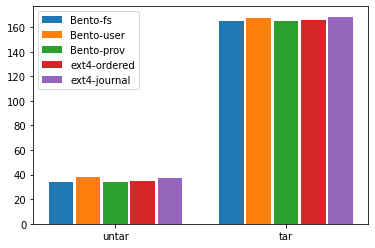

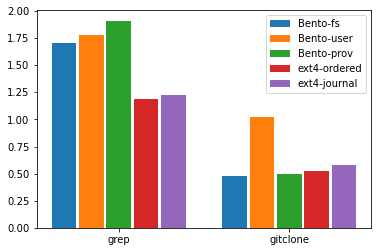

In [52]:
otherapps_1 = ["untar", "tar"]
otherapps_2 = ["grep", "gitclone"]
otherapps_results_1 = {}
otherapps_results_2 = {}
for fs in fsl:
	otherapps_results_1[fs] = []
	for app in otherapps_1:
		tmp = []
		dir = "./results/" + fs + "/" + app
		for f in os.listdir(dir):
			i = int(f.split("_")[1])
			fr = open(dir + "/" + f, 'r')
			t = fr.read()
			fr.close()
			matches = re.findall("\d*:\d*.\d*(?=elapsed)", t)
			tmp.append(parse_elapsed_secs(matches[0]))
		otherapps_results_1[fs].append(mean(tmp))
	otherapps_results_2[fs] = []
	for app in otherapps_2:
		tmp = []
		dir = "./results/" + fs + "/" + app
		for f in os.listdir(dir):
			i = int(f.split("_")[1])
			fr = open(dir + "/" + f, 'r')
			t = fr.read()
			fr.close()
			matches = re.findall("\d*:\d*.\d*(?=elapsed)", t)
			tmp.append(parse_elapsed_secs(matches[0]))
		otherapps_results_2[fs].append(mean(tmp))
print(otherapps_results_1)
print(otherapps_results_2)

fig, ax = plt.subplots()
#bax = brokenaxes(ylims=((0, 10), (25, 50), (150, 170)), hspace=.1)
bar_plot(ax, otherapps_results_1, fsl, total_width=.8, single_width=.9)
plt.xticks(range(len(otherapps_1)), otherapps_1)
plt.show()
fig, ax = plt.subplots()
#bax = brokenaxes(ylims=((0, 10), (25, 50), (150, 170)), hspace=.1)
bar_plot(ax, otherapps_results_2, fsl, total_width=.8, single_width=.9)
plt.xticks(range(len(otherapps_2)), otherapps_2)
plt.show()

#width =0.3
#for i, fs in enumerate(fsl):
#	plt.bar(np.arange(len(otherapps_results[fs])) + i * width, otherapps_results[fs], width=width)
#plt.xticks(range(len(otherapps)), otherapps)
#plt.show()

{'Bento-fs': [0.13036462299999999, 0.119022662, 48.769999999999996, 70.46000000000001], 'Bento-user': [0.130360918, 0.13324229899999998, 45.18, 67.86], 'Bento-prov': [0.127778189, 0.12300950399999999, 47.57, 70.64], 'ext4-ordered': [0.142344385, 0.140035218, 41.16, 69.59], 'ext4-journal': [0.139769209, 0.134250801, 39.7, 67.54]}


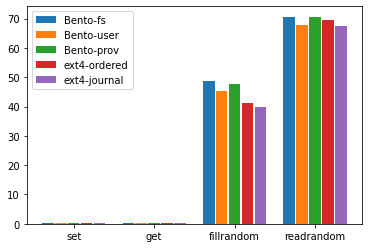

In [48]:
redisrocks = ["set", "get", "fillrandom", "readrandom"]
redisrocks_results = {}

for fs in fsl:
	redisrocks_results[fs] = []
	tmp_set = []
	tmp_get = []
	dir = "./results/" + fs + "/redis"
	for f in os.listdir(dir):
		i = int(f.split("_")[1])
		fr = open(dir + "/" + f, 'r')
		t = fr.read()
		fr.close()
		matches = re.findall("\d*.\d*(?= requests per second)", t)
		tmp_set.append(float(matches[0]) * 0.000001) # convert bytes to Megabytes
		tmp_get.append(float(matches[1]) * 0.000001) # convert bytes to Megabytes
	redisrocks_results[fs].append(mean(tmp_set))
	redisrocks_results[fs].append(mean(tmp_get))

	tmp_fillrandom = []
	tmp_readrandom = []
	dir = "./results/" + fs + "/rocksdb"
	for f in os.listdir(dir):
		i = int(f.split("_")[1])
		fr = open(dir + "/" + f, 'r')
		t = fr.read()
		fr.close()
		matches = re.findall("\d*.\d*(?= MB/s)", t)
		tmp_fillrandom.append(float(matches[0]))
		tmp_readrandom.append(float(matches[1]))
	redisrocks_results[fs].append(mean(tmp_fillrandom))
	redisrocks_results[fs].append(mean(tmp_readrandom))

print(redisrocks_results)
fig, ax = plt.subplots()
#bax = brokenaxes(ylims=((0, 10), (25, 50), (150, 170)), hspace=.1)
bar_plot(ax, redisrocks_results, fsl, total_width=.8, single_width=.9)
plt.xticks(range(len(redisrocks)), redisrocks)
plt.show()

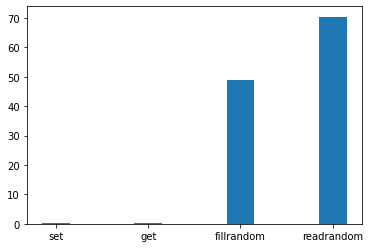

In [10]:
redisrocks = ["set", "get", "fillrandom", "readrandom"]
redisrocks_results = {}

for fs in fsl:
	redisrocks_results[fs] = []
	tmp_set = []
	tmp_get = []
	dir = "./results/" + fs + "/redis"
	for f in os.listdir(dir):
		i = int(f.split("_")[1])
		fr = open(dir + "/" + f, 'r')
		t = fr.read()
		fr.close()
		matches = re.findall("\d*.\d*(?= requests per second)", t)
		tmp_set.append(float(matches[0]) * 0.000001) # convert bytes to Megabytes
		tmp_get.append(float(matches[1]) * 0.000001) # convert bytes to Megabytes
	redisrocks_results[fs].append(mean(tmp_set))
	redisrocks_results[fs].append(mean(tmp_get))

	tmp_fillrandom = []
	tmp_readrandom = []
	dir = "./results/" + fs + "/rocksdb"
	for f in os.listdir(dir):
		i = int(f.split("_")[1])
		fr = open(dir + "/" + f, 'r')
		t = fr.read()
		fr.close()
		matches = re.findall("\d*.\d*(?= MB/s)", t)
		tmp_fillrandom.append(float(matches[0]))
		tmp_readrandom.append(float(matches[1]))
	redisrocks_results[fs].append(mean(tmp_fillrandom))
	redisrocks_results[fs].append(mean(tmp_readrandom))

print(redisrocks_results)
width =0.3
for fs in fsl:
	plt.bar(np.arange(len(redisrocks_results[fs])), redisrocks_results[fs], width=width)
plt.xticks(range(len(redisrocks)), redisrocks)
plt.show()

In [20]:
sns.load_dataset("tips")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


{'Bento-fs': [0.13036462299999999, 0.119022662, 48.769999999999996, 70.46000000000001]}


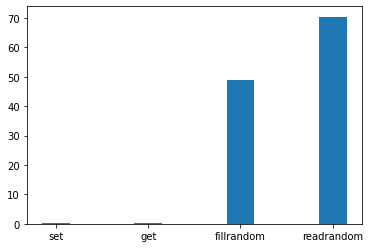

In [10]:
redisrocks = ["set", "get", "fillrandom", "readrandom"]
redisrocks_results = {}

for fs in fsl:
	redisrocks_results[fs] = []
	tmp_set = []
	tmp_get = []
	dir = "./results/" + fs + "/redis"
	for f in os.listdir(dir):
		i = int(f.split("_")[1])
		fr = open(dir + "/" + f, 'r')
		t = fr.read()
		fr.close()
		matches = re.findall("\d*.\d*(?= requests per second)", t)
		tmp_set.append(float(matches[0]) * 0.000001) # convert bytes to Megabytes
		tmp_get.append(float(matches[1]) * 0.000001) # convert bytes to Megabytes
	redisrocks_results[fs].append(mean(tmp_set))
	redisrocks_results[fs].append(mean(tmp_get))

	tmp_fillrandom = []
	tmp_readrandom = []
	dir = "./results/" + fs + "/rocksdb"
	for f in os.listdir(dir):
		i = int(f.split("_")[1])
		fr = open(dir + "/" + f, 'r')
		t = fr.read()
		fr.close()
		matches = re.findall("\d*.\d*(?= MB/s)", t)
		tmp_fillrandom.append(float(matches[0]))
		tmp_readrandom.append(float(matches[1]))
	redisrocks_results[fs].append(mean(tmp_fillrandom))
	redisrocks_results[fs].append(mean(tmp_readrandom))

print(redisrocks_results)
width =0.3
for fs in fsl:
	plt.bar(np.arange(len(redisrocks_results[fs])), redisrocks_results[fs], width=width)
plt.xticks(range(len(redisrocks)), redisrocks)
plt.show()